## 1. World map using Python

### Library Installation : 
`pip install matplotlib`</br>
` pip install cartopy`

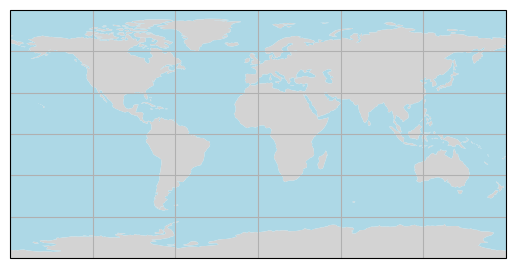

In [33]:
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Optional: Set the environment variable to specify where cartopy should look for the data
# Replace the path below with the directory where you've stored the Natural Earth data
os.environ['CARTOPY_USER_BACKGROUNDS'] = r'C:\path\to\your\natural_earth_data'

# Projection setup
projection = ccrs.PlateCarree()

# Create a figure with the specified projection
fig, ax = plt.subplots(subplot_kw={'projection': projection})

# Set the map extent (longitude and latitude boundaries)
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# Add land and ocean features using the Natural Earth data
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Add gridlines to the map
ax.gridlines()

# Show the plot
plt.show()


## 2. Convert emoji into text in Python

### Library Installation : 
`pip install demoji`

In [34]:
import demoji  # Import the demoji library for emoji handling

# Define a string with various emojis
text = "❤️️✌⭐✍😍"

# Use demoji to find and return a dictionary of emojis and their descriptions in the text
result = demoji.findall(text)

# Print the result to see the emojis and their descriptions
print(result)


{'❤️': 'red heart', '✍': 'writing hand', '😍': 'smiling face with heart-eyes', '✌': 'victory hand', '⭐': 'star'}


## 3. Generate a Wi-Fi QR code using Python

### Library Installation : 
`pip install wifi_qrcode_generator`

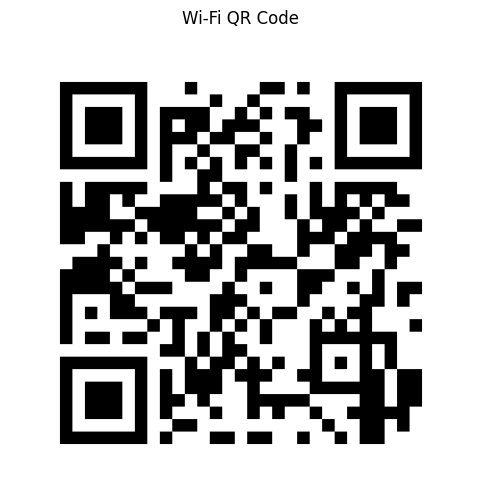

In [15]:
from wifi_qrcode_generator import wifi_qrcode  # Import the wifi_qrcode function from the wifi_qrcode_generator library
import matplotlib.pyplot as plt

# Generate a Wi-Fi QR code with the given parameters
qr_code = wifi_qrcode(
    ssid="<SSID>",                # Network name (SSID)
    authentication_type="WPA",    # Wi-Fi security type
    password="<PASSWORD>",        # Network password
    hidden=False                  # Whether the SSID is hidden (False means it is not hidden)
)

# Create an image of the QR code
qr_code_img = qr_code.make_image()

# Convert the image to a format compatible with matplotlib
qr_code_img = qr_code_img.convert('RGB')

# Display the QR code as a plot using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(qr_code_img)
plt.axis('off')  # Hide the axes
plt.title('Wi-Fi QR Code')
plt.show()

## 4. Calendar month using Python

In [16]:
import calendar

def display_calendar():
    cal = calendar.TextCalendar(calendar.SUNDAY)
    month_calendar = cal.formatmonth(2024, 9)
    print(month_calendar)

display_calendar()


   September 2024
Su Mo Tu We Th Fr Sa
 1  2  3  4  5  6  7
 8  9 10 11 12 13 14
15 16 17 18 19 20 21
22 23 24 25 26 27 28
29 30



## 5. CAPTCHA in Python using captcha Library

### Library Installation : 
`pip install captcha`

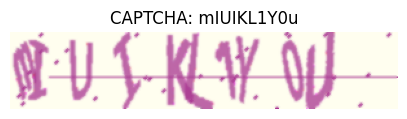

In [17]:
from captcha.image import ImageCaptcha
import random
import string
import io
from PIL import Image
import matplotlib.pyplot as plt

def generate_captcha_text(length=10):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=length))

def generate_captcha_image(captcha_text, image_width=300):
    image = ImageCaptcha(width=image_width)
    image_data = image.generate(captcha_text)
    image = Image.open(io.BytesIO(image_data.read()))
    return image

captcha_text = generate_captcha_text()
image = generate_captcha_image(captcha_text)

# Display the CAPTCHA image using matplotlib
plt.figure(figsize=(5, 2))  # Adjust the figure size as needed
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.title(f"CAPTCHA: {captcha_text}")
plt.show()


## 6. Pencil Sketch using Python

### Library Installation : 
`pip install opencv-python matplotlib`

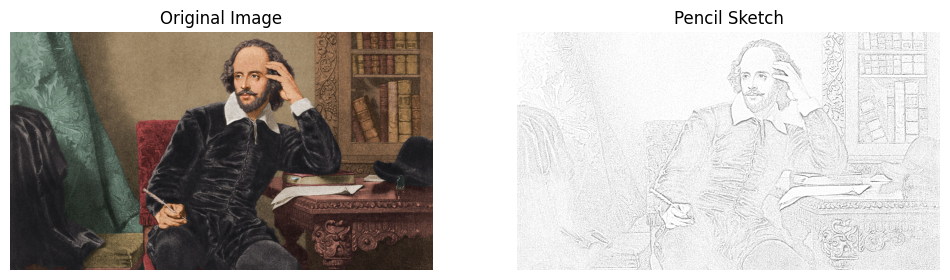

In [18]:
import cv2
import matplotlib.pyplot as plt

def pencil_sketch(image_path):
    # Read the input image
    image = cv2.imread(image_path)
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Invert the grayscale image
    inverted_gray_image = cv2.bitwise_not(gray_image)
    # Apply Gaussian blur to the inverted image
    blurred_image = cv2.GaussianBlur(inverted_gray_image, (21, 21), 0)
    # Invert the blurred image
    inverted_blurred_image = cv2.bitwise_not(blurred_image)
    # Create the pencil sketch image
    pencil_sketch_image = cv2.divide(gray_image, inverted_blurred_image, scale=256.0)
    
    # Plot the input image and the pencil sketch
    plt.figure(figsize=(12, 6))
    
    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original Image')
    
    # Plot the pencil sketch image
    plt.subplot(1, 2, 2)
    plt.imshow(pencil_sketch_image, cmap='gray')
    plt.axis('off')
    plt.title('Pencil Sketch')
    
    plt.show()

input_image_path = './images/shakespeare.jpg'
pencil_sketch(input_image_path)


## 7. Watermarking in python

### Library Installation :
pip install pillow matplotlib

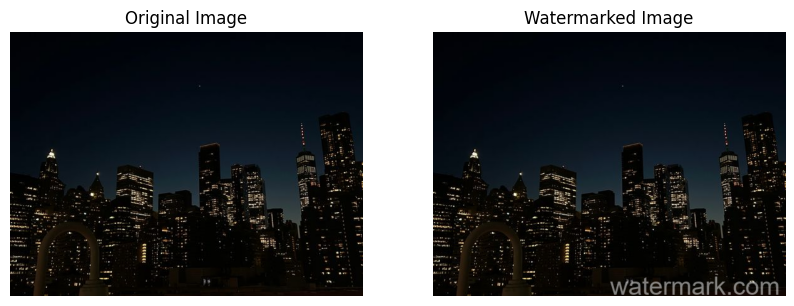

In [2]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

def add_watermark(input_image_path, watermark_text):
    original = Image.open(input_image_path).convert("RGBA")
    
    # Create a new blank image for the watermark with transparent background
    txt = Image.new("RGBA", original.size, (255, 255, 255, 0))
    
    # Load a font
    font = ImageFont.truetype("arial.ttf", 40)
    
    # Initialize ImageDraw
    draw = ImageDraw.Draw(txt)
    width, height = original.size
    
    # Get text bounding box for the watermark
    text_bbox = draw.textbbox((0, 0), watermark_text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    
    # Set position for the watermark
    position = (width - text_width - 10, height - text_height - 10)
    
    # Add text to the watermark image
    draw.text(position, watermark_text, fill=(255, 255, 255, 128), font=font)
    
    # Combine the original image with the watermark
    watermarked = Image.alpha_composite(original, txt)
    
    # Display original and watermarked images using Matplotlib
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Show the original image
    original_rgb = original.convert("RGB")
    ax[0].imshow(original_rgb)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    # Show the watermarked image
    watermarked_rgb = watermarked.convert("RGB")
    ax[1].imshow(watermarked_rgb)
    ax[1].set_title('Watermarked Image')
    ax[1].axis('off')

    plt.show()

# Example usage
add_watermark("./images/watermark.jpg", "watermark.com")


## 8. Remove Image Background using Python


### Library Installation :
`pip install rembg`

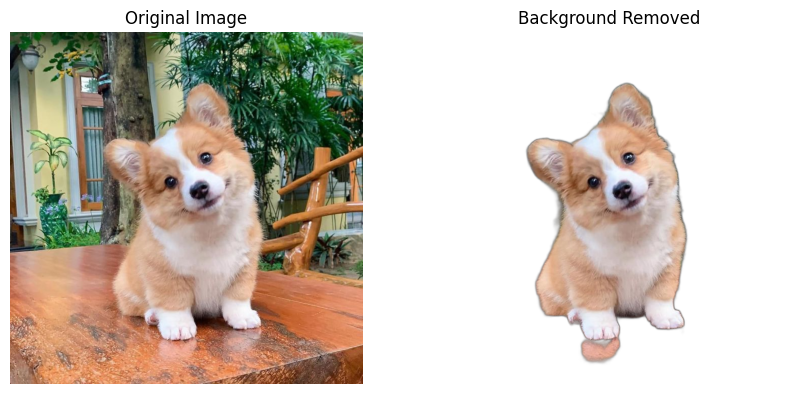

In [7]:
from rembg import remove
from PIL import Image
import matplotlib.pyplot as plt

def remove_background(input_path):
    inp = Image.open(input_path)
    output = remove(inp)
    
    # Display the original and the output image side by side
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Show the original image
    ax[0].imshow(inp)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    # Show the image with background removed
    ax[1].imshow(output)
    ax[1].set_title('Background Removed')
    ax[1].axis('off')

    plt.show()

# Example usage
remove_background("./images/dog-img.jpeg")


## 9. Creating Progress Bars using Python


### Library Installation :
`pip install rich`

Output()

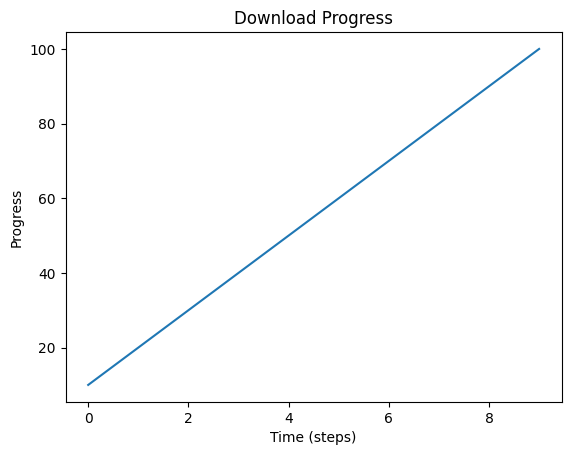

In [20]:
from rich.progress import Progress
import time
import matplotlib.pyplot as plt

progress_values = []

with Progress() as progress:
    task = progress.add_task("[cyan] Downloading...", total=100)
    while not progress.finished:
        progress.update(task, advance=10)
        progress_values.append(progress.tasks[0].completed)  # Store completed value
        time.sleep(0.2)

# Create a plot
plt.plot(progress_values)
plt.xlabel("Time (steps)")
plt.ylabel("Progress")
plt.title("Download Progress")
plt.show()


## 10. Image Color Extraction in Python 

### Library Installation :
pip install scikit-learn

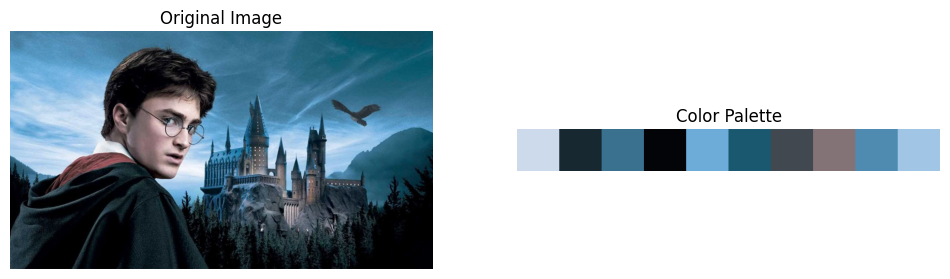

In [21]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.cluster import KMeans

# Load and process the image
image = mpimg.imread('./images/harry-potter.jpg')
w, h, d = image.shape
pixels = image.reshape(w * h, d) 

# Perform KMeans clustering
n_colors = 10
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(pixels)
palette = np.uint8(kmeans.cluster_centers_)

# Display the original image and the color palette side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display original image
axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title('Original Image')

# Display color palette
palette_image = np.zeros((50, n_colors * 50, 3), dtype=np.uint8)
for i in range(n_colors):
    palette_image[:, i * 50:(i + 1) * 50] = palette[i]

axes[1].imshow(palette_image)
axes[1].axis('off')
axes[1].set_title('Color Palette')

plt.show()
